In [1303]:
import numpy as np
import pandas as pd
import wave
import os


# Типы данных амплитуд
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32,
}


# Открытие файла на рвзбор
# Переделать !!!!

#filepath = '/Users/nikita/Desktop/misc/DP_Flute02_86_Amin.wav'

# Сделай общий вид

def wave_open(filepath):
    if not os.path.exists(filepath):
        return None
    with open(filepath, 'r') as file_handler:
        wavf =  wave.open(filepath, mode='r')
        return wavf

wav = wave_open("/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/output_a_train.wav")
# Различные вкусности из wave-файла
def nchannals():
    nchannals_var = wav.getnchannels()
    return nchannals_var

def sampwidth():
    sampwidth_var = wav.getsampwidth()
    return  sampwidth_var

def framerate():
    framerate_var = wav.getframerate()
    return framerate_var

def nframes():
    nframes_var = wav.getnframes()
    return  nframes_var

def comptype():
    comptype_var = wav.getcomptype()
    return comptype_var

def compname():
    compname_var = wav.getcompname()
    return compname_var


def duration():
    duration_var = nframes()/framerate()
    return duration_var

# Значения амплитуд в 10-ричной системе счисления
def channel_data():
    byte_content = wav.readframes(nframes())
    samples = np.fromstring(byte_content, dtype=types[sampwidth()])
    #for n in range(nchannals()):
    channel = samples
    return channel

byte_content = wav.readframes(nframes())
samples = np.fromstring(byte_content, dtype=types[sampwidth()])
samples = samples[1000:]
#samples = samples[0:1000]
samples_log = np.log(samples+32768)
len(samples)

263192

In [1304]:
import matplotlib.pyplot as plt

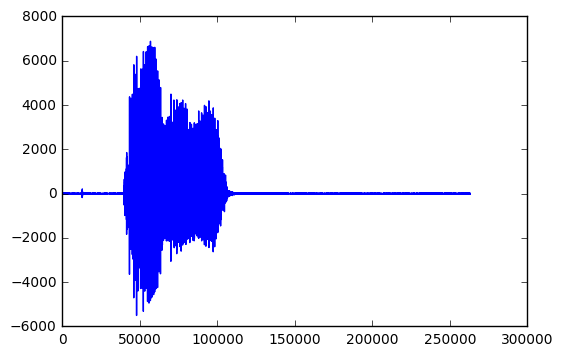

In [1305]:
plt.plot(range(len(samples)),samples)
plt.show()

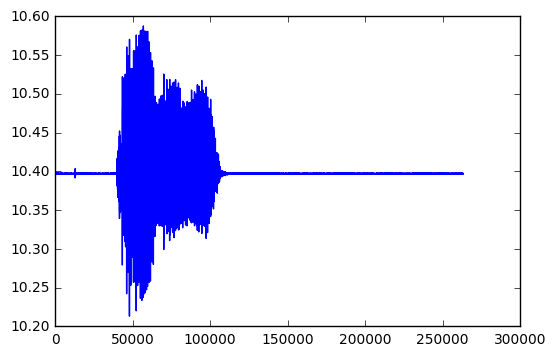

In [1306]:
plt.plot(range(len(samples_log)),samples_log)
plt.show()

In [1307]:
samples_fourier = np.fft.fft(samples_log)

In [1308]:
#samples_fourier

In [1309]:
#plt.plot(range(len(samples_fourier)),samples_fourier,)#'ro')
#plt.show()

In [1310]:
len(np.imag(samples_fourier))

263192

In [1311]:
#plt.plot(np.real(samples_fourier),'ro')
#plt.plot(np.imag(samples_fourier),np.real(samples_fourier))
#plt.show()
add = np.arange(1000)
#sp = np.fft.fft(samples_fourier)
freq = np.fft.fftfreq(add.shape[-1])
#plt.plot(freq, samples_fourier.imag)
#plt.show()

In [1312]:
fourier_samples = []
begin = 0
step = 1000
end = step
tmp_sample = samples[begin:end]
fourier_samples.append(np.fft.fft(np.log(tmp_sample+32768)).real)


while end < len(samples):
    abs_sample = [abs(i) for i in tmp_sample]
    if sum(abs_sample) > 50000:
        tmp_sample = np.log(tmp_sample+32768)
        tmp_fourier = np.fft.fft(tmp_sample).real
        fourier_samples.append(tmp_fourier)
        begin += step
        end += step
        tmp_sample = samples[begin:end]
        print(end,sum(tmp_sample),sum(abs_sample))
    else:
        print(end,sum(abs_sample),'-')
        begin += step
        end += step
        tmp_sample = samples[begin:end]


        

1000 1490 -
2000 1614 -
3000 1828 -
4000 1857 -
5000 1630 -
6000 1657 -
7000 1771 -
8000 1579 -
9000 1469 -
10000 1718 -
11000 1758 -
12000 1818 -
13000 19367 -
14000 15178 -
15000 7713 -
16000 2414 -
17000 2259 -
18000 1811 -
19000 1955 -
20000 1644 -
21000 1664 -
22000 1841 -
23000 1612 -
24000 1592 -
25000 1663 -
26000 1503 -
27000 1440 -
28000 1523 -
29000 2045 -
30000 1630 -
31000 1427 -
32000 1965 -
33000 1861 -
34000 1797 -
35000 1744 -
36000 1770 -
37000 1622 -
38000 1877 -
39000 1993 -
40000 30802 -
42000 566 393107
43000 21591 522680
44000 -1067 575225
45000 -4268 807503
46000 -29257 950516
47000 -17257 865783
48000 12385 1029343
49000 66733 1382641
50000 -10001 1096069
51000 18447 884993
52000 -54999 931861
53000 7957 958431
54000 35176 1041893
55000 -184118 1223134
56000 145035 1566686
57000 -46541 1811949
58000 95325 1628937
59000 -3782 1644133
60000 -37721 1588300
61000 29492 1455849
62000 -36316 1277874
63000 5207 1078310
64000 4192 926575
65000 10855 963726
66000 -5655 

In [1313]:
len(fourier_samples)

68

In [1314]:
import pandas as pd
from collections import OrderedDict

In [1315]:
ids_f = [i for i in range(len(fourier_samples))]

In [1316]:
answer = pd.DataFrame(fourier_samples)
#answer = pd.DataFrame(OrderedDict(ids=ids_f, fourier_sample=fourier_samples))[['ids', 'fourier_sample']]

In [1318]:
answer.to_csv('/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/fourier_a_train.csv', index=False)

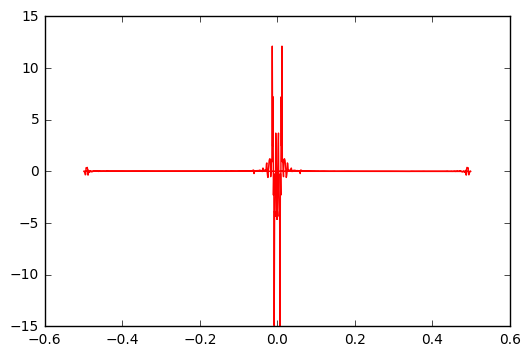

10392.9832318


In [1252]:
#fourier_samples[0]
which = 27


ys = fourier_samples[which][1:]
t = np.arange(len(ys))
freq = np.fft.fftfreq(t.shape[-1])


plt.plot(freq,ys,'r')
plt.show()

print(max(fourier_samples[which]))


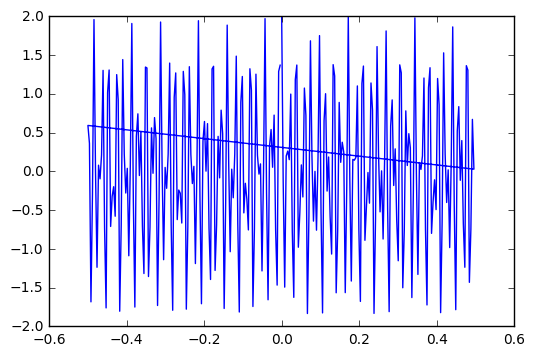

In [769]:
t = np.arange(256)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq,np.cos(5*t)+np.cos(2*t))
plt.show()

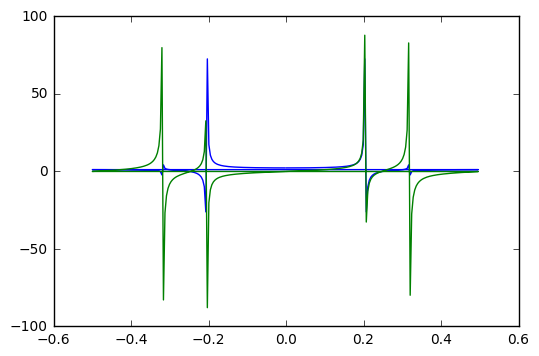

In [717]:
import matplotlib.pyplot as plt
#t = np.arange(256)
sp = np.fft.fft(np.cos(5*t)+np.cos(2*t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
#plt.plot(t,np.cos(t))
plt.show()